# EDA

In [1]:
import sqlite3
import pandas as pd
from collections import defaultdict
import re
import numpy as np
import math
from string import punctuation
import matplotlib.pyplot as plt

In [2]:
# Stopwords 처리
pattern1 = re.compile(r'[{}]'.format(re.escape(punctuation))) # punctuation 제거
pattern2 = re.compile(r'[^가-힣 ]') # 특수문자, 모음, 숫자, 영어 제거
pattern3 = re.compile(r'\s{2,}') # white space 1개로 바꾸기.

## 데이터 불러오기
- 데이터가 너무 많기도 하고, 계속해서 수집 중에 있으므로 그 중 일부만 EDA를 진행하였다.

In [3]:
# conn.close()

In [4]:
conn = sqlite3.connect('Humor.db')
cur = conn.cursor()
df = pd.read_sql('SELECT * FROM head',conn)

In [5]:
df.drop(['pk', 'page'], axis=1, inplace=True)

In [6]:
df.head()

,head,wdate,cdate,ref
0,머리 짧게 자르는 미용사들 ㅈ같음,20/07/30 23:52,2020-07-30 08:16:08,1
1,"??? : ""거기가 한국이야?""",20/07/30 23:44,2020-07-30 08:16:08,1
2,폰 잃어버려서 영상통화 걸었더니,20/07/30 23:38,2020-07-30 08:16:08,1
3,부반장을 싫어하던 담임,20/07/30 23:29,2020-07-30 08:16:08,1
4,한국인 여러분 코로나19 없는 프랑스로 오세요,20/07/30 22:58,2020-07-30 08:16:08,1


In [7]:
# 불용어처리
df['head'] = df['head'].map(lambda x:pattern3.sub(' ',
                                      pattern2.sub('',
                                      pattern1.sub('', x))))

In [8]:
# punctuation, 특수문자, 모음, 숫자, 영어가 제거되었고 white space 1개로 변환되었다. 
df.head()

,head,wdate,cdate,ref
0,머리 짧게 자르는 미용사들 같음,20/07/30 23:52,2020-07-30 08:16:08,1
1,거기가 한국이야,20/07/30 23:44,2020-07-30 08:16:08,1
2,폰 잃어버려서 영상통화 걸었더니,20/07/30 23:38,2020-07-30 08:16:08,1
3,부반장을 싫어하던 담임,20/07/30 23:29,2020-07-30 08:16:08,1
4,한국인 여러분 코로나 없는 프랑스로 오세요,20/07/30 22:58,2020-07-30 08:16:08,1


In [9]:
df.info()
# 총 1,252,520개의 게시글이 있다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252520 entries, 0 to 1252519
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   head    1252520 non-null  object
 1   wdate   1252520 non-null  object
 2   cdate   1252520 non-null  object
 3   ref     1252520 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 38.2+ MB


In [10]:
# 중복제거
# df.drop_duplicates(['head'],keep='first', inplace=True)

In [11]:
train_set = pd.Series(df['head'].to_list())

In [12]:
len(train_set)

1252520

In [13]:
train_set.head()

0          머리 짧게 자르는 미용사들 같음
1                   거기가 한국이야
2          폰 잃어버려서 영상통화 걸었더니
3               부반장을 싫어하던 담임
4    한국인 여러분 코로나 없는 프랑스로 오세요
dtype: object

In [14]:
print('총 게시물 수 : {} 건'.format(len(np.unique(train_set))))
print('중복 게시물 수 : {} 건'.format(np.sum(train_set.value_counts() > 1)))

총 게시물 수 : 1062094 건
중복 게시물 수 : 51881 건


- 1,252,520개의 데이터에서 1,062,094건이 unique한 데이터 이므로 190,426건이 중복되어있음을 알 수 있다. 
- 중복 게시물 수 는 51,881건으로 나타났다. 
- 다음에서는 중복적인 게시글의 개수를 시각화 할 것이다.

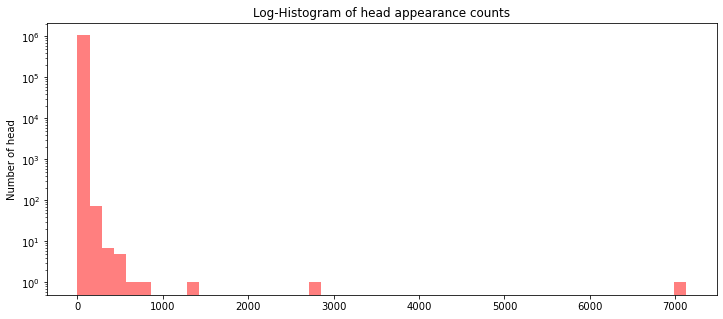

In [15]:
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of head appearance counts')
plt.ylabel('Number of head')
plt.show()

In [16]:
train_set.value_counts()
# 중복인 내용들

                              7128
                              2832
아                             1396
흔드르라                           835
속보 노무현 전 대통령 사                 581
                              ... 
저격 짱깨놈들 한국인 주민번호를 로 만들었단다        1
저걸 가져다주네                         1
전두환이 폭격명령                        1
지구 역사상 최강의 폭발 에너지 비교             1
조선 뉴스에 크레용팝이랑 일베 입갤했다            1
Length: 1062094, dtype: int64

In [17]:
train_set.value_counts().describe()

count    1.062094e+06
mean     1.179293e+00
std      8.101516e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      7.128000e+03
dtype: float64

- 위 히스토그램은 중복된 게시글의 개수를 나타낸 것이다. 평균 중복된 게시글 개수는 약 1.18개이며 최대값은 7128개이다. 
- 7128개의 중복적인 게시글을 확인한 결과 공백인 값으로 나타났다.
- 중복된 게시글이 존재하는 이유는, 데이터 수집 과정에서 다른 게시글의 작성으로 게시글의 순서가 밀려 다시 수집될 수 있기 때문이다.
- 이 정보를 다음과 같이 시각화하였다.
    - 아래의 분포는 중복 횟수의 이상치가 너무 넓고 많이 분포해서 box plot의 다른 값을 확인하기조차 어렵다.

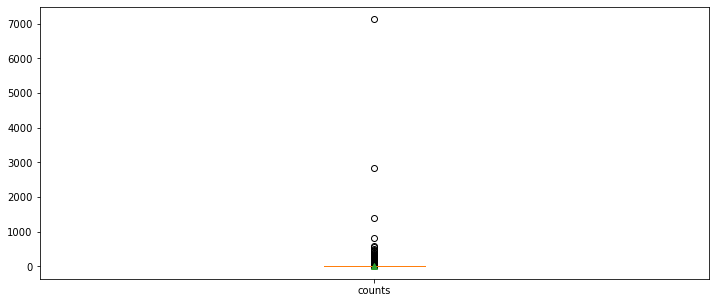

In [18]:
plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()],
            labels=['counts'],
            showmeans=True)
plt.show()

- 아래는 문자단위로 게시글의 길이 분포를 나타난 것이다.
- 데이터의 각 게시글의 길이 분포는 0~50에 대부분 모여있는 것을 알 수 있다.
- 또한 평균 게시글의 문자길이는 약 13.7인 것을 알 수 있다.

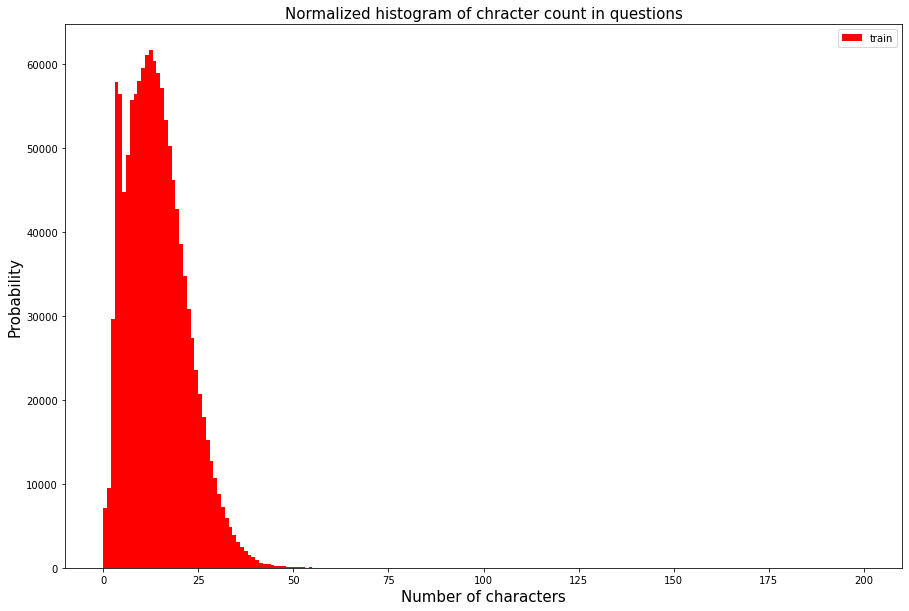

In [19]:
train_length = train_set.apply(len)

plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', label='train')
plt.title('Normalized histogram of chracter count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

In [20]:
train_length.describe()

count    1.252520e+06
mean     1.367505e+01
std      7.917521e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.300000e+01
75%      1.900000e+01
max      2.390000e+02
dtype: float64

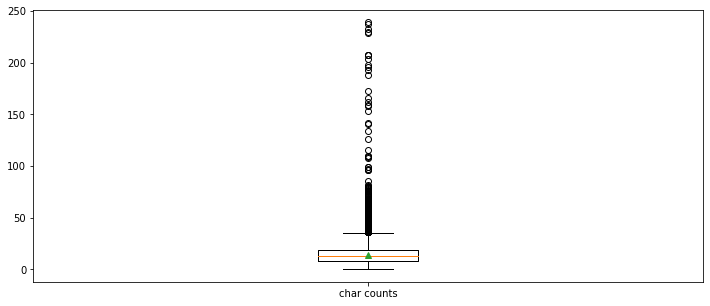

In [21]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['char counts'], showmeans=True)
plt.show()

- 아래는 게시글의 단어 개수를 나타낸 것이다.
    - 여기서 단어는 white space를 기준으로 자른 것을 의미한다.
- 게시글의 단어수는 대부분 0~10 단어로 이루어진 것을 알 수 있다.
- 게시글의 평균 단어수는 약 3.8개이다.

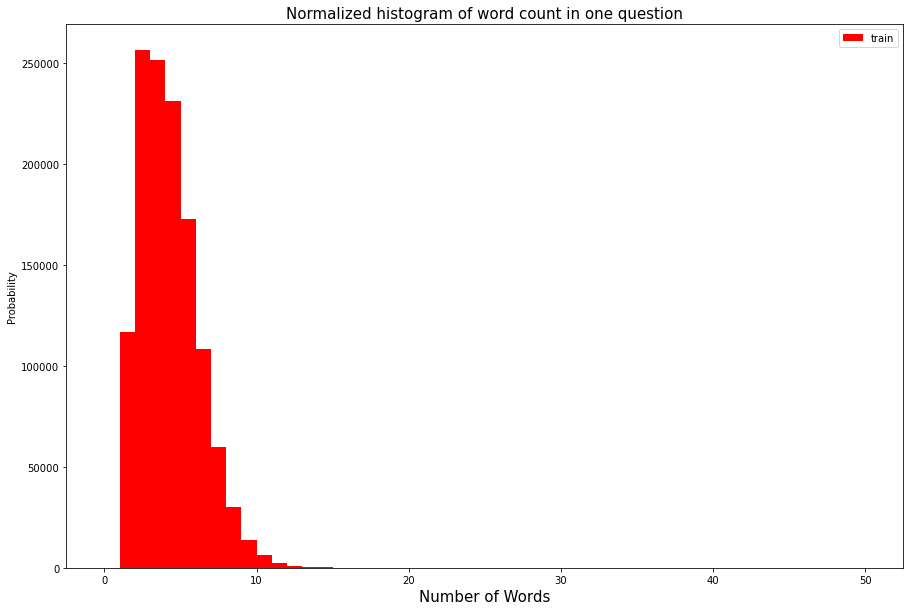

In [22]:
train_word_counts = train_set.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], color='r', label='train')
plt.title('Normalized histogram of word count in one question', fontsize=15)
plt.legend()
plt.xlabel('Number of Words', fontsize=15)
plt.ylabel('Probability')
plt.show()

In [23]:
train_word_counts.describe()

count    1.252520e+06
mean     3.771348e+00
std      1.946946e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.900000e+01
dtype: float64

In [24]:
train_set

0                머리 짧게 자르는 미용사들 같음
1                         거기가 한국이야
2                폰 잃어버려서 영상통화 걸었더니
3                     부반장을 싫어하던 담임
4          한국인 여러분 코로나 없는 프랑스로 오세요
                    ...           
1252515      태영호가 북한인이냐 이인영이 북한인이냐
1252516                   술 끊을까 말까
1252517                    상업용 고조선
1252518               에어컨 전기세 왤케 쌈
1252519                    싱하형 근황 
Length: 1252520, dtype: object

In [25]:
tokenized_head = [r.split() for r in train_set]

In [26]:
tokenized_head

[['머리', '짧게', '자르는', '미용사들', '같음'],
 ['거기가', '한국이야'],
 ['폰', '잃어버려서', '영상통화', '걸었더니'],
 ['부반장을', '싫어하던', '담임'],
 ['한국인', '여러분', '코로나', '없는', '프랑스로', '오세요'],
 ['오타쿠', '체형을', '가진', '일본인이', '증가'],
 ['엄마얼굴만지는', '아기고양이'],
 ['퇴사했는데', '월급을', '아직까지', '안보내주셨어'],
 ['미생', '명장면중', '한장면'],
 ['키', '여자', '체감짤'],
 ['조상복합', '아파트'],
 ['찾지말아주세요퇴사할게요'],
 ['진중권의', '천적', '등장'],
 ['기레기라는', '단어는', '일베용어입니다'],
 ['일본', '할아버지가', '년째', '한국어를', '배우는이유'],
 ['솔로', '레전드'],
 ['다신신도시', '당신네', '택배회사', '이용', '안하면될거아냐'],
 ['후지산에서', '아침을', '맞이하는', '짤'],
 ['여고생', '키스금지'],
 ['전래동화', '금도끼', '은도끼에필로그'],
 ['스스로', '불러온', '재앙에', '짓눌려'],
 ['지금은', '사라진', '국내', '유일의', '전통', '부대찌개집'],
 ['쯔양의', '미국', '스테이크', '먹방을', '본', '반응'],
 ['최현우도', '못하는', '마술'],
 ['남양', '세븐일레븐', '신상품이', '나왔군요'],
 ['개판난', '움짤', '모음'],
 ['키크니님', '오늘자', '갬성'],
 ['홍철', '나니까', '이렇게', '깨우는거야'],
 ['년', '전', '사망했다는', '운전자'],
 ['신입이가', '이상하다'],
 ['여자의', '마음을', '여는', '비밀번호'],
 ['미국의', '피자', '종류'],
 ['시각장애인', '엄마를', '둔', '딸의', '몸에', '들어간', '귀신'],
 ['아무것도', '안', '했는데', '장애인으

In [27]:
head_len_by_token = [len(t) for t in tokenized_head]

In [28]:
head_len_by_eumjeol = [len(s.replace(' ', '')) for s in train_set]

In [29]:
# 단어 갯수 기반 통계값
print('문장 최대 길이 : {}'.format(np.max(head_len_by_token)))
print('문장 최소 길이 : {}'.format(np.min(head_len_by_token)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(head_len_by_token)))
print('문장 길이 표준편타 : {:.2f}'.format(np.std(head_len_by_token)))
print('문장 중간 길이 : {}'.format(np.median(head_len_by_token)))
print('제 1사분위 길이 : {}'.format(np.percentile(head_len_by_token, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(head_len_by_token, 75)))

문장 최대 길이 : 59
문장 최소 길이 : 0
문장 평균 길이 : 3.48
문장 길이 표준편타 : 2.01
문장 중간 길이 : 3.0
제 1사분위 길이 : 2.0
제 3사분위 길이 : 5.0


In [30]:
# 글자 갯수 기반 통계값
# 위에서 진행한 분석과 차이가 나는 이유는 white space의 차이이다.
print('문장 최대 길이 : {}'.format(np.max(head_len_by_eumjeol)))
print('문장 최소 길이 : {}'.format(np.min(head_len_by_eumjeol)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(head_len_by_eumjeol)))
print('문장 길이 표준편타 : {:.2f}'.format(np.std(head_len_by_eumjeol)))
print('문장 중간 길이 : {}'.format(np.median(head_len_by_eumjeol)))
print('제 1사분위 길이 : {}'.format(np.percentile(head_len_by_eumjeol, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(head_len_by_eumjeol, 75)))

문장 최대 길이 : 185
문장 최소 길이 : 0
문장 평균 길이 : 10.90
문장 길이 표준편타 : 6.20
문장 중간 길이 : 10.0
제 1사분위 길이 : 6.0
제 3사분위 길이 : 15.0


- 아래는 각 커뮤니티 별 WordCloud를 나타낸 것이다.
    - 보이는 것처럼, 일상생활에서 자주 사용하지 않는 용어들이 커뮤니티마다 다르게 많이 등장한다.

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

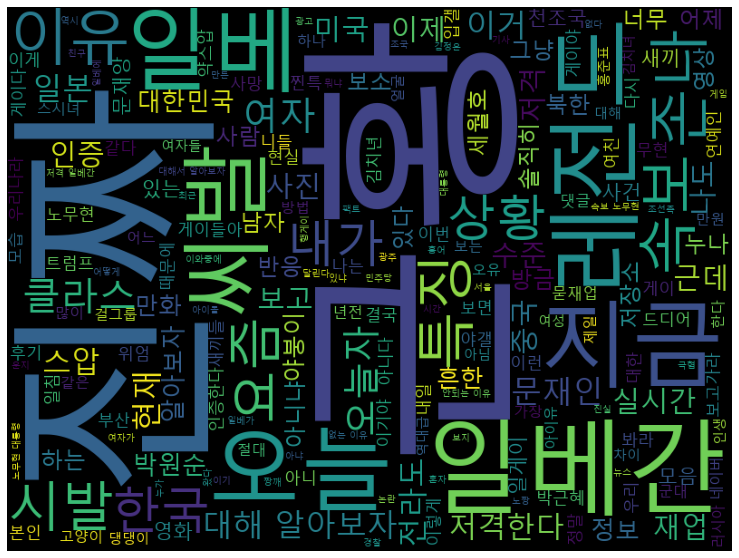

In [32]:
wordcloud = WordCloud(font_path=r'/Users/juyeon/Desktop/빅데이터/bigdata_project주연/src/preprocessor/malgun.ttf',stopwords=STOPWORDS, background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(df['head']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
from PIL import Image

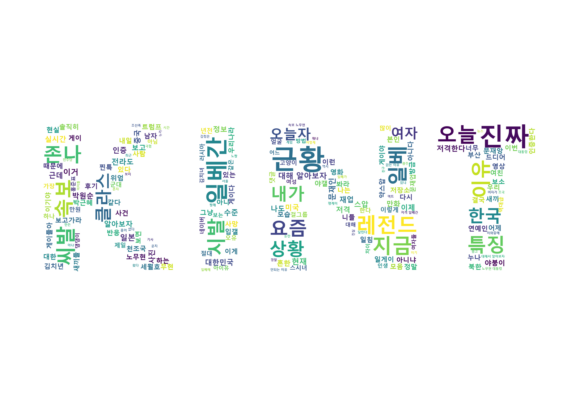

In [34]:
kint3_mask = np.array(Image.open("kint3_mask.jpg"))
font_path = '/Users/juyeon/Desktop/빅데이터/bigdata_project주연/src/preprocessor/malgunbd.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = kint3_mask
)

wordcloud = wordcloud.generate(' '.join(df['head']))

kint = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

kint.savefig('./kint3_mask.png')

In [35]:
df_ou = df[df['ref']==1]

In [36]:
df_ou.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   head    9000 non-null   object
 1   wdate   9000 non-null   object
 2   cdate   9000 non-null   object
 3   ref     9000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 351.6+ KB


In [37]:
train_set = pd.Series(df_ou['head'].to_list())
print('오늘의 유머 총 게시물 수 : {} 건'.format(len(np.unique(train_set))))

오늘의 유머 총 게시물 수 : 8704 건


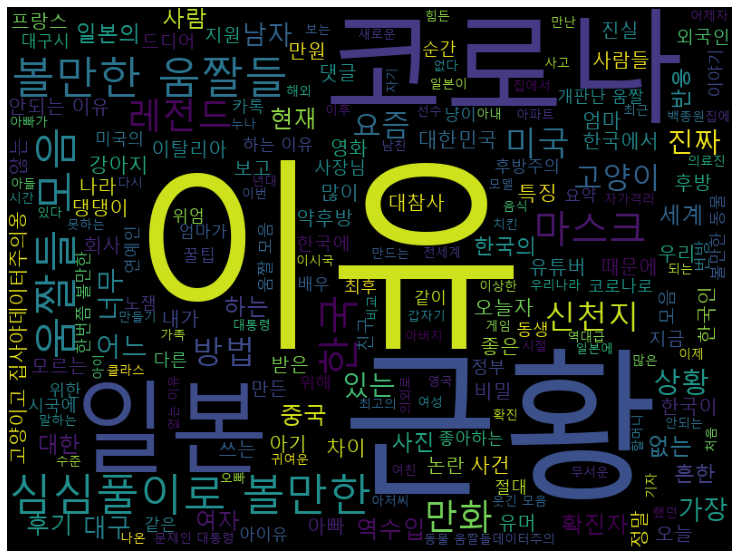

In [38]:
wordcloud = WordCloud(font_path=r'/Users/juyeon/Desktop/빅데이터/bigdata_project주연/src/preprocessor/malgun.ttf',stopwords=STOPWORDS, background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(df_ou['head']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [39]:
df_ilbe = df[df['ref']==2]

In [40]:
df_ilbe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 9000 to 38999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   head    30000 non-null  object
 1   wdate   30000 non-null  object
 2   cdate   30000 non-null  object
 3   ref     30000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [41]:
train_set = pd.Series(df_ilbe['head'].to_list())
print('일베 총 게시물 수 : {} 건'.format(len(np.unique(train_set))))

일베 총 게시물 수 : 28786 건


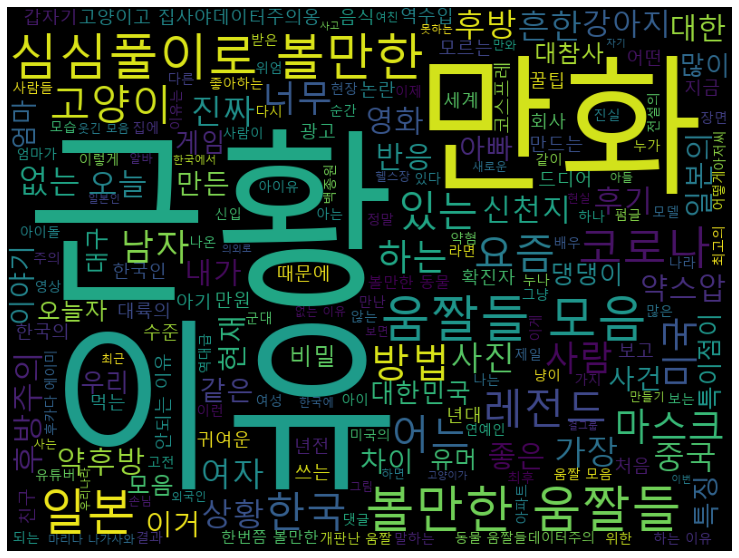

In [42]:
wordcloud = WordCloud(font_path=r'/Users/juyeon/Desktop/빅데이터/bigdata_project주연/src/preprocessor/malgun.ttf',stopwords=STOPWORDS, background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(df_ilbe['head']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [43]:
df_DCbaseball = df[df['ref']==3]

In [44]:
df_DCbaseball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738319 entries, 39000 to 777318
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   head    738319 non-null  object
 1   wdate   738319 non-null  object
 2   cdate   738319 non-null  object
 3   ref     738319 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 28.2+ MB


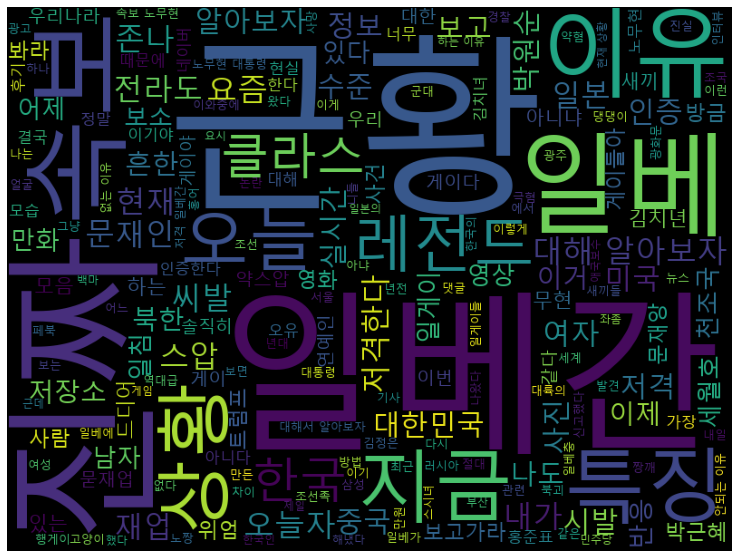

In [45]:
wordcloud = WordCloud(font_path=r'/Users/juyeon/Desktop/빅데이터/bigdata_project주연/src/preprocessor/malgun.ttf',stopwords=STOPWORDS, background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(df_DCbaseball['head']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [46]:
train_set = pd.Series(df_DCbaseball['head'].to_list())
print('디시 야구갤러리 총 게시물 수 : {} 건'.format(len(np.unique(train_set))))

디시 야구갤러리 총 게시물 수 : 718215 건


In [47]:
df_BB = df[df['ref']==4]

In [48]:
df_BB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475201 entries, 777319 to 1252519
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   head    475201 non-null  object
 1   wdate   475201 non-null  object
 2   cdate   475201 non-null  object
 3   ref     475201 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 18.1+ MB


In [49]:
train_set = pd.Series(df_BB['head'].to_list())
print('뽐뿌 총 게시물 수 : {} 건'.format(len(np.unique(train_set))))

뽐뿌 총 게시물 수 : 318654 건


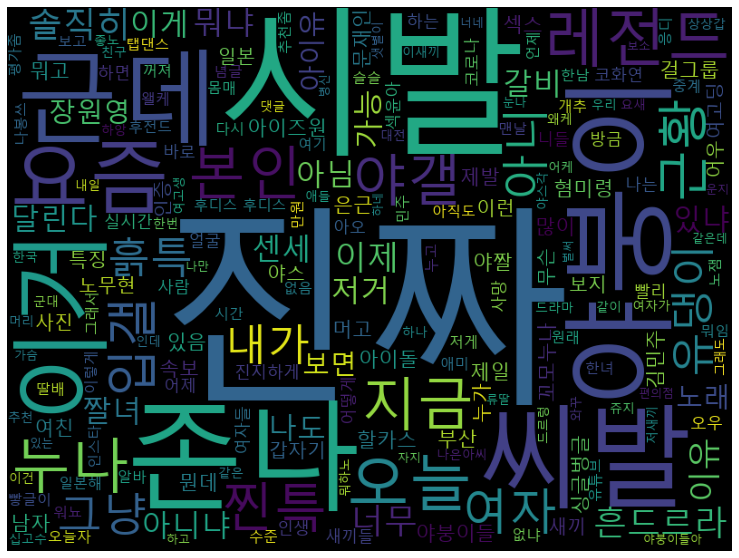

In [50]:
wordcloud = WordCloud(font_path=r'/Users/juyeon/Desktop/빅데이터/bigdata_project주연/src/preprocessor/malgun.ttf',stopwords=STOPWORDS, background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(df_BB['head']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()